# **CAPSTONE PROJECT II**

**JCDSOL-013-021 NATASHA VERENA LOHANATHA**

# LATAR BELAKANG

Supermarket melakukan program membership sebagai bentuk pengumpulan sampling untuk mengetahui demografik pelanggan dan insight untuk kegiatan marketing supermarket. Rentang waktu data adalah dari Juni 2012 - Juni 2014 (2 tahun).  

## Pernyataan Masalah

Supermarket ingin mengetahui **siapa kelas pelanggan terbesar mereka, apa kebutuhan mereka dan cara menggapai mereka**. Diketahui secara kasar rendahnya angka customer yang ikut berpartisipasi dalam aktifitas kampanye penjualan. Karena itu informasi ini akan digunakan sebagai landasan perencanaan kampanye marketing periode tahun 2014-2015, tipe "always on" maupun periodik sesuai dengan target market untuk meningkatkan partisipasi dan sebagai bentuk tolak ukur naiknya "brand awareness" diantara customer lama maupun yang akan bergabung nantinya. Kedepannya, data ini juga bisa menjadi faktor pertimbangan untuk tim purchasing dan/atau procurement (divisi produk dan pengembangan bisnis) dalam mengkurasikan barang dan menetapkan harga barang yang sesuai dengan target market Supermarket.    

## Tujuan

* Mengetahui demografik pelanggan Supermarket berdasarkan kelas pendapatan (Income Class) dan kegiatan berbelanja (Membership)
* Mengetahui barang dengan jumlah purchasing tertinggi berdasarkan kelas pendapatan (Income Class) dan kegiatan berbelanja (Membership) 
* Mengetahui channel berbelanja berdasarkan kelas pendapatan (Income Class) dan kegiatan berbelanja (Membership)
* Memprediksi produk unggulan dan bentuk promosi yang sesuai serta menentukan set KPI untuk periode 2014-15 untuk meningkatkan jumlah dan kualitas transaksi di Supermarket   

# READ DATA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [4]:
scust = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
scust

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Berikut deskripsi informasi yang terdapat di dalam dataset Supermarket Customer: 

| Kategori          | Kolom                 | Deskripsi                                                                     |
| ------------------|-----------------------|------------------------------------------------------------------------------ |
| **People**        | ID                    | Identitas unik customer                                                       |
|                   | Year_Birth            | Tahun lahir customer                                                          |
|                   | Education             | Level edukasi customer                                                        |
|                   | Marital_Status        | Status pernikahan customer                                                    |
|                   | Income                | Pendapatan per tahun customer                                                 |
|                   | Kidhome               | Jumlah anak dalam rumahtangga customer                                        |
|                   | Teenhome              | Jumlah remaja dalam rumahtangga customer                                      |
|                   | Dt_Customer           | tanggal pendaftaran customer menjadi member Supermarket                       |
|                   | Recency               | Jumlah hari sejak terakhir kali customer berbelanja                           |
|                   | Complain              | 1 jika customer pernah komplain selama 2 tahun terakhir, jika tidak 0         |    
| **Products**      | MntWines              | Jumlah (buah) pembelian produk wine dalam 2 tahun terakhir                    |
|                   | MntFruits             | Jumlah (buah) pembelian produk buah dalam 2 tahun terakhir                    |
|                   | MntMeatProducts       | Jumlah (buah) pembelian produk daging dalam 2 tahun terakhir                  |
|                   | MntFishProducts       | Jumlah (buah) pembelian produk ikan dalam 2 tahun terakhir                    |
|                   | MntSweetProducts      | Jumlah (buah) pembelian produk manis dalam 2 tahun terakhir                   |
|                   | MntGoldProds          | Jumlah (buah) pembelian produk emas dalam 2 tahun terakhir                    |
| **Promotion**     | NumDealsPurchases     | Jumlah pembelian menggunakan/melalui promosi                                  |
|                   | AcceptedCmp1          | 1 jika customer menerima tawaran kampanye 1, jika tidak 0                     |
|                   | AcceptedCmp2          | 1 jika customer menerima tawaran kampanye 2, jika tidak 0                     |
|                   | AcceptedCmp3          | 1 jika customer menerima tawaran kampanye 3, jika tidak 0                     |
|                   | AcceptedCmp4          | 1 jika customer menerima tawaran kampanye 4, jika tidak 0                     |
|                   | AcceptedCmp5          | 1 jika customer menerima tawaran kampanye 5, jika tidak 0                     |
|                   | Response              | 1 jika customer menerima tawaran kampanye terakhir, jika tidak 0              |
| **Place**         | NumWebPurchases       | Jumlah pembelian melalui website Supermarket                                  |
|                   | NumCatalogPurchases   | Jumlah pembelian melalui katalog Supermarket                                  |
|                   | NumStorePurchases     | Jumlah pembelian melalui toko Supermarket                                     |
|                   | NumWebVisitsMonth     | Jumlah pengunjungan ke website Supermarket selama sebulan terakhir            |

# DATA UNDERSTANDING

Sebelum masuk ke analisis data, kita akan mengenal lebih lanjut dan mengolah dataset tersebut setelahnya. Di dalam tahapan *Data Understanding* kita akan mengetahui anomali-anomali apa saja yang terdapat di dalam dataset  yang nantinya akan disesuaikan dan ditangani dalam tahapan pengolahan yaitu *Data Cleaning*. Berikut adalah proses *Data Understanding*:   

## Unique

Pertama, kita akan mengidentifikasi data unik per kolom untuk mengetahui jenis insformasi/value yang terdapat dalam tiap kolom:  

In [5]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in scust.columns :
    listItem.append( [col, scust[col].nunique(), scust[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Komentar: 
* ID adalah unik per individu member 
* "year of birth" (tahun kelahiran) akan diganti menjadi value "age" (umur)
* dalam "education", value 'basic' dan '2n cycle' akan diredefinisikan
* dalam "marital status", value 'alone', 'absurd' dan 'YOLO' akan diredefinisikan
* "marital status" akan dikategorikan menjadi jumlah anggota rumahtangga 1 atau 2 orang, ditambah dengan jumlah dari "kidhome" dan "teenhome" = "household member"     
* "income" akan dikategorikan dengan cara mengkobinasi nilai dari "income" dan "household member" = "income class" 
* kolom "acceptedcmp" tidak berurutan sehingga perlu dirapihkan dengan cara diurutkan  
* "z_revenue" dan "z_costcontact" hanya memiliki 1 data unik, yang artinya kolom tersebut tidak mendiskripsikan maupun membedakan 1 member dengan yang lainnya karena itu kolom ini akan dihapus 
* "response" tidak didefinisikan secara jelas dan spesifik dan berpotensi tumpang tindih dengan data kampanye 5 (kampanye terakhir itu apakah kampanye 5 atau malah 6?) sehingga akan dihapus  

## Type

Kedua, kita akan melihat tipe data value di tiap kolom:

In [6]:
scust.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Komment: 
* "dt_customer" dideskripsikan sebagai tipe "object" padahal value sebenarnya adalah berupa tanggalan (date). Tipe data akan disesuaikan

## Missing

Ketiga, kita akan memeriksa apabila terdapat data tanpa value:  

In [7]:
scust.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Komentar: 
* terdapat 24 'n/a' value di dalam kolom "income". Row atau baris denga value 'n/a' akan dihapus 

## Numerical statistic

Keempat, kita akan melihat data numerical dan melihat distribusi, outliers dan corelation diantara data-data numerical tersebut: 

In [8]:
numerik = scust.select_dtypes(include='number')
scust.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_13840\2282908085.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2282908085.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2282908085.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2282908085.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2282908085.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2282908085.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\

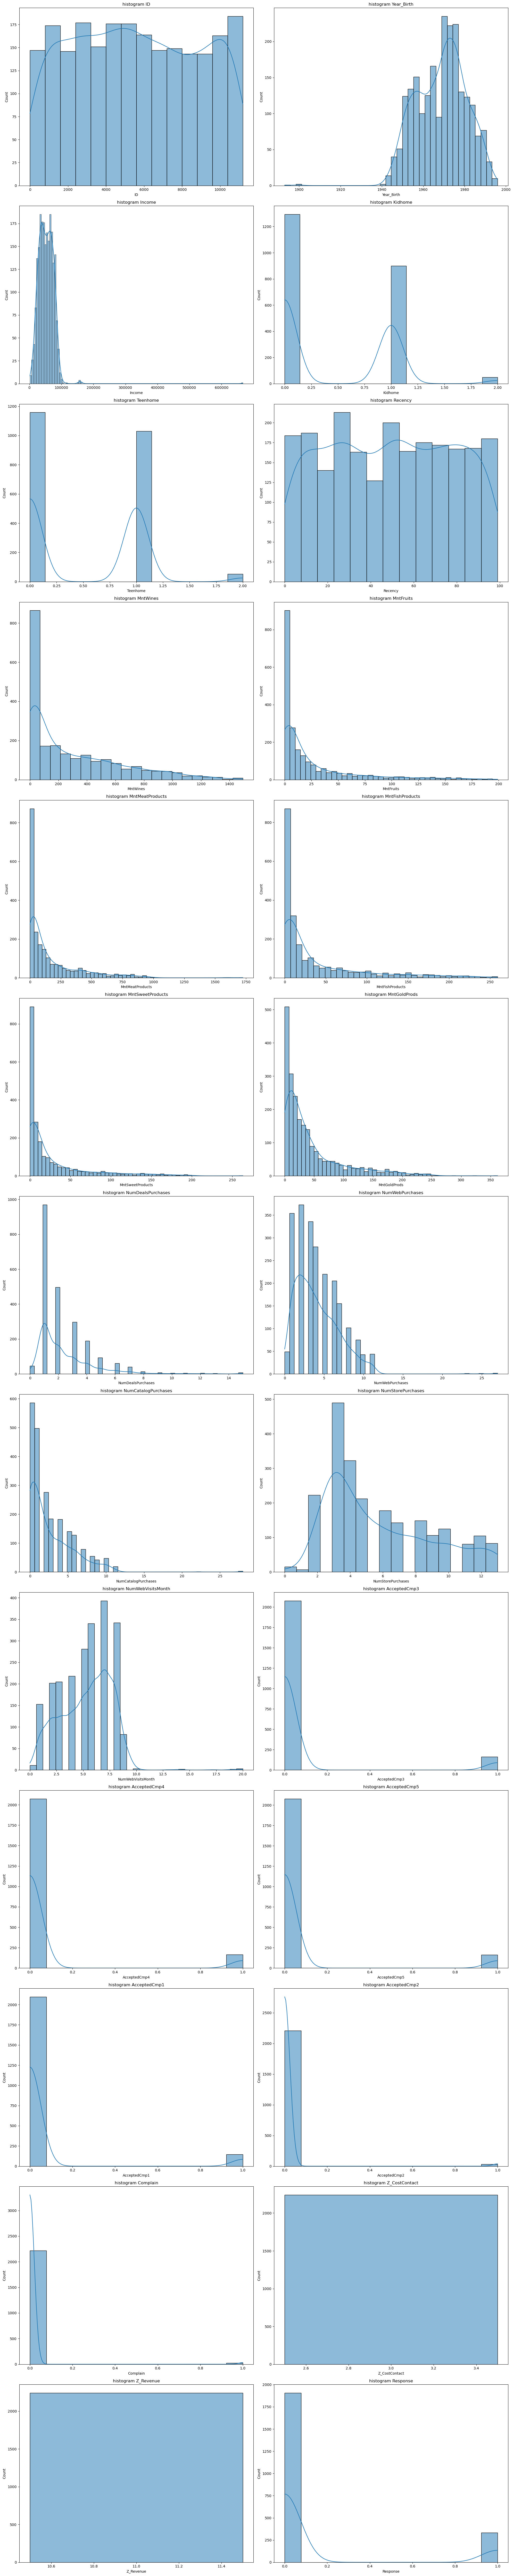

In [9]:
fig = plt.figure(figsize=(20,100)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(13,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

### ouliers

C:\Users\User\AppData\Local\Temp\ipykernel_13840\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk


C:\Users\User\AppData\Local\Temp\ipykernel_13840\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\Temp\ipykernel_13840\2122181805.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\User\AppData\Local\

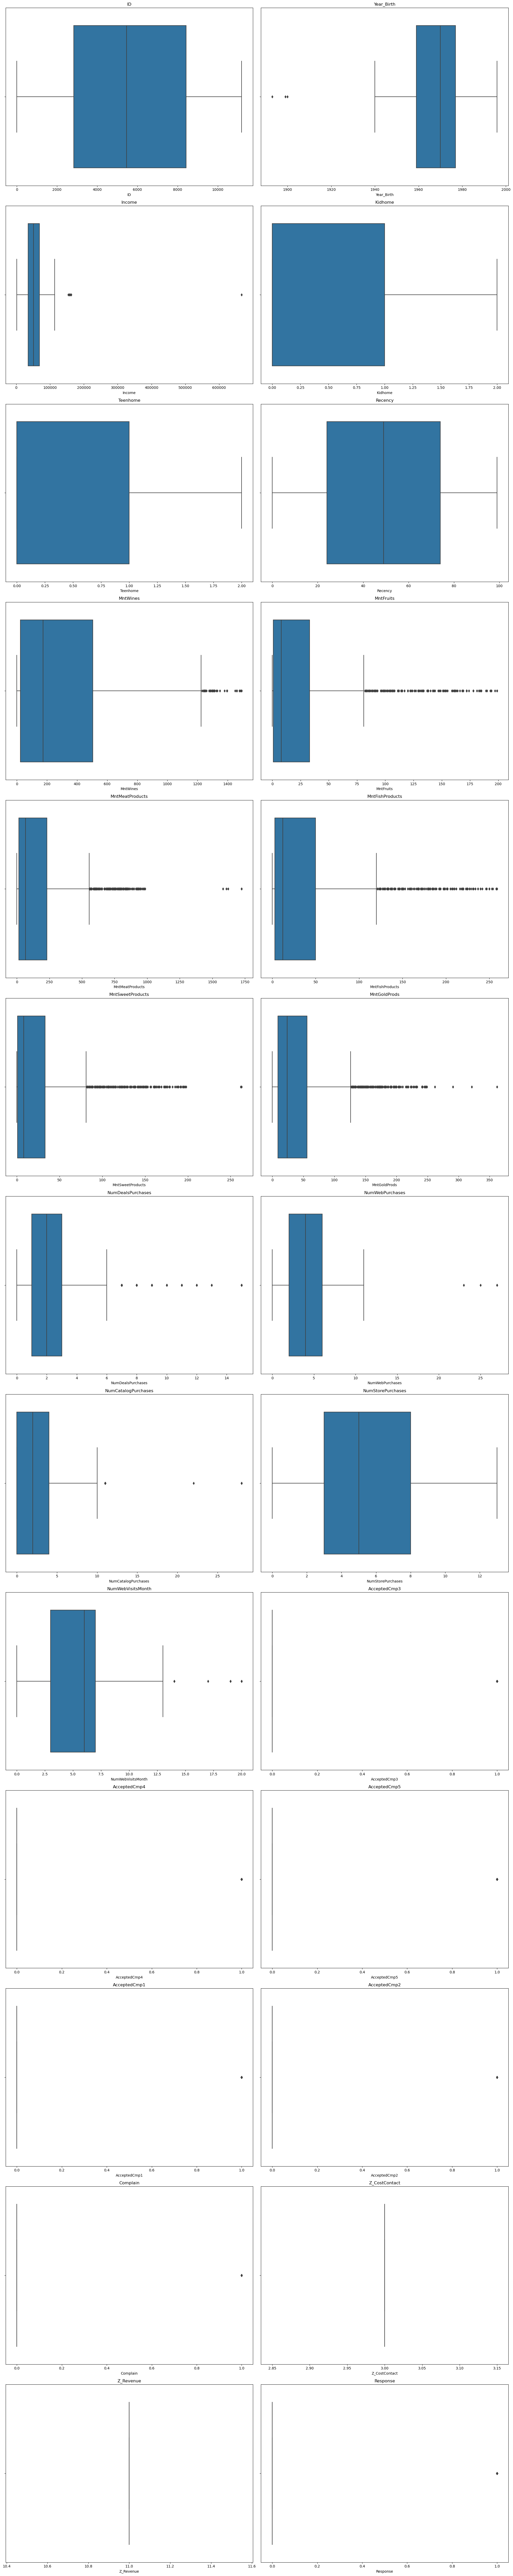

In [10]:
fig = plt.figure(figsize=(20,100)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(13,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

### Corelations

<Axes: >

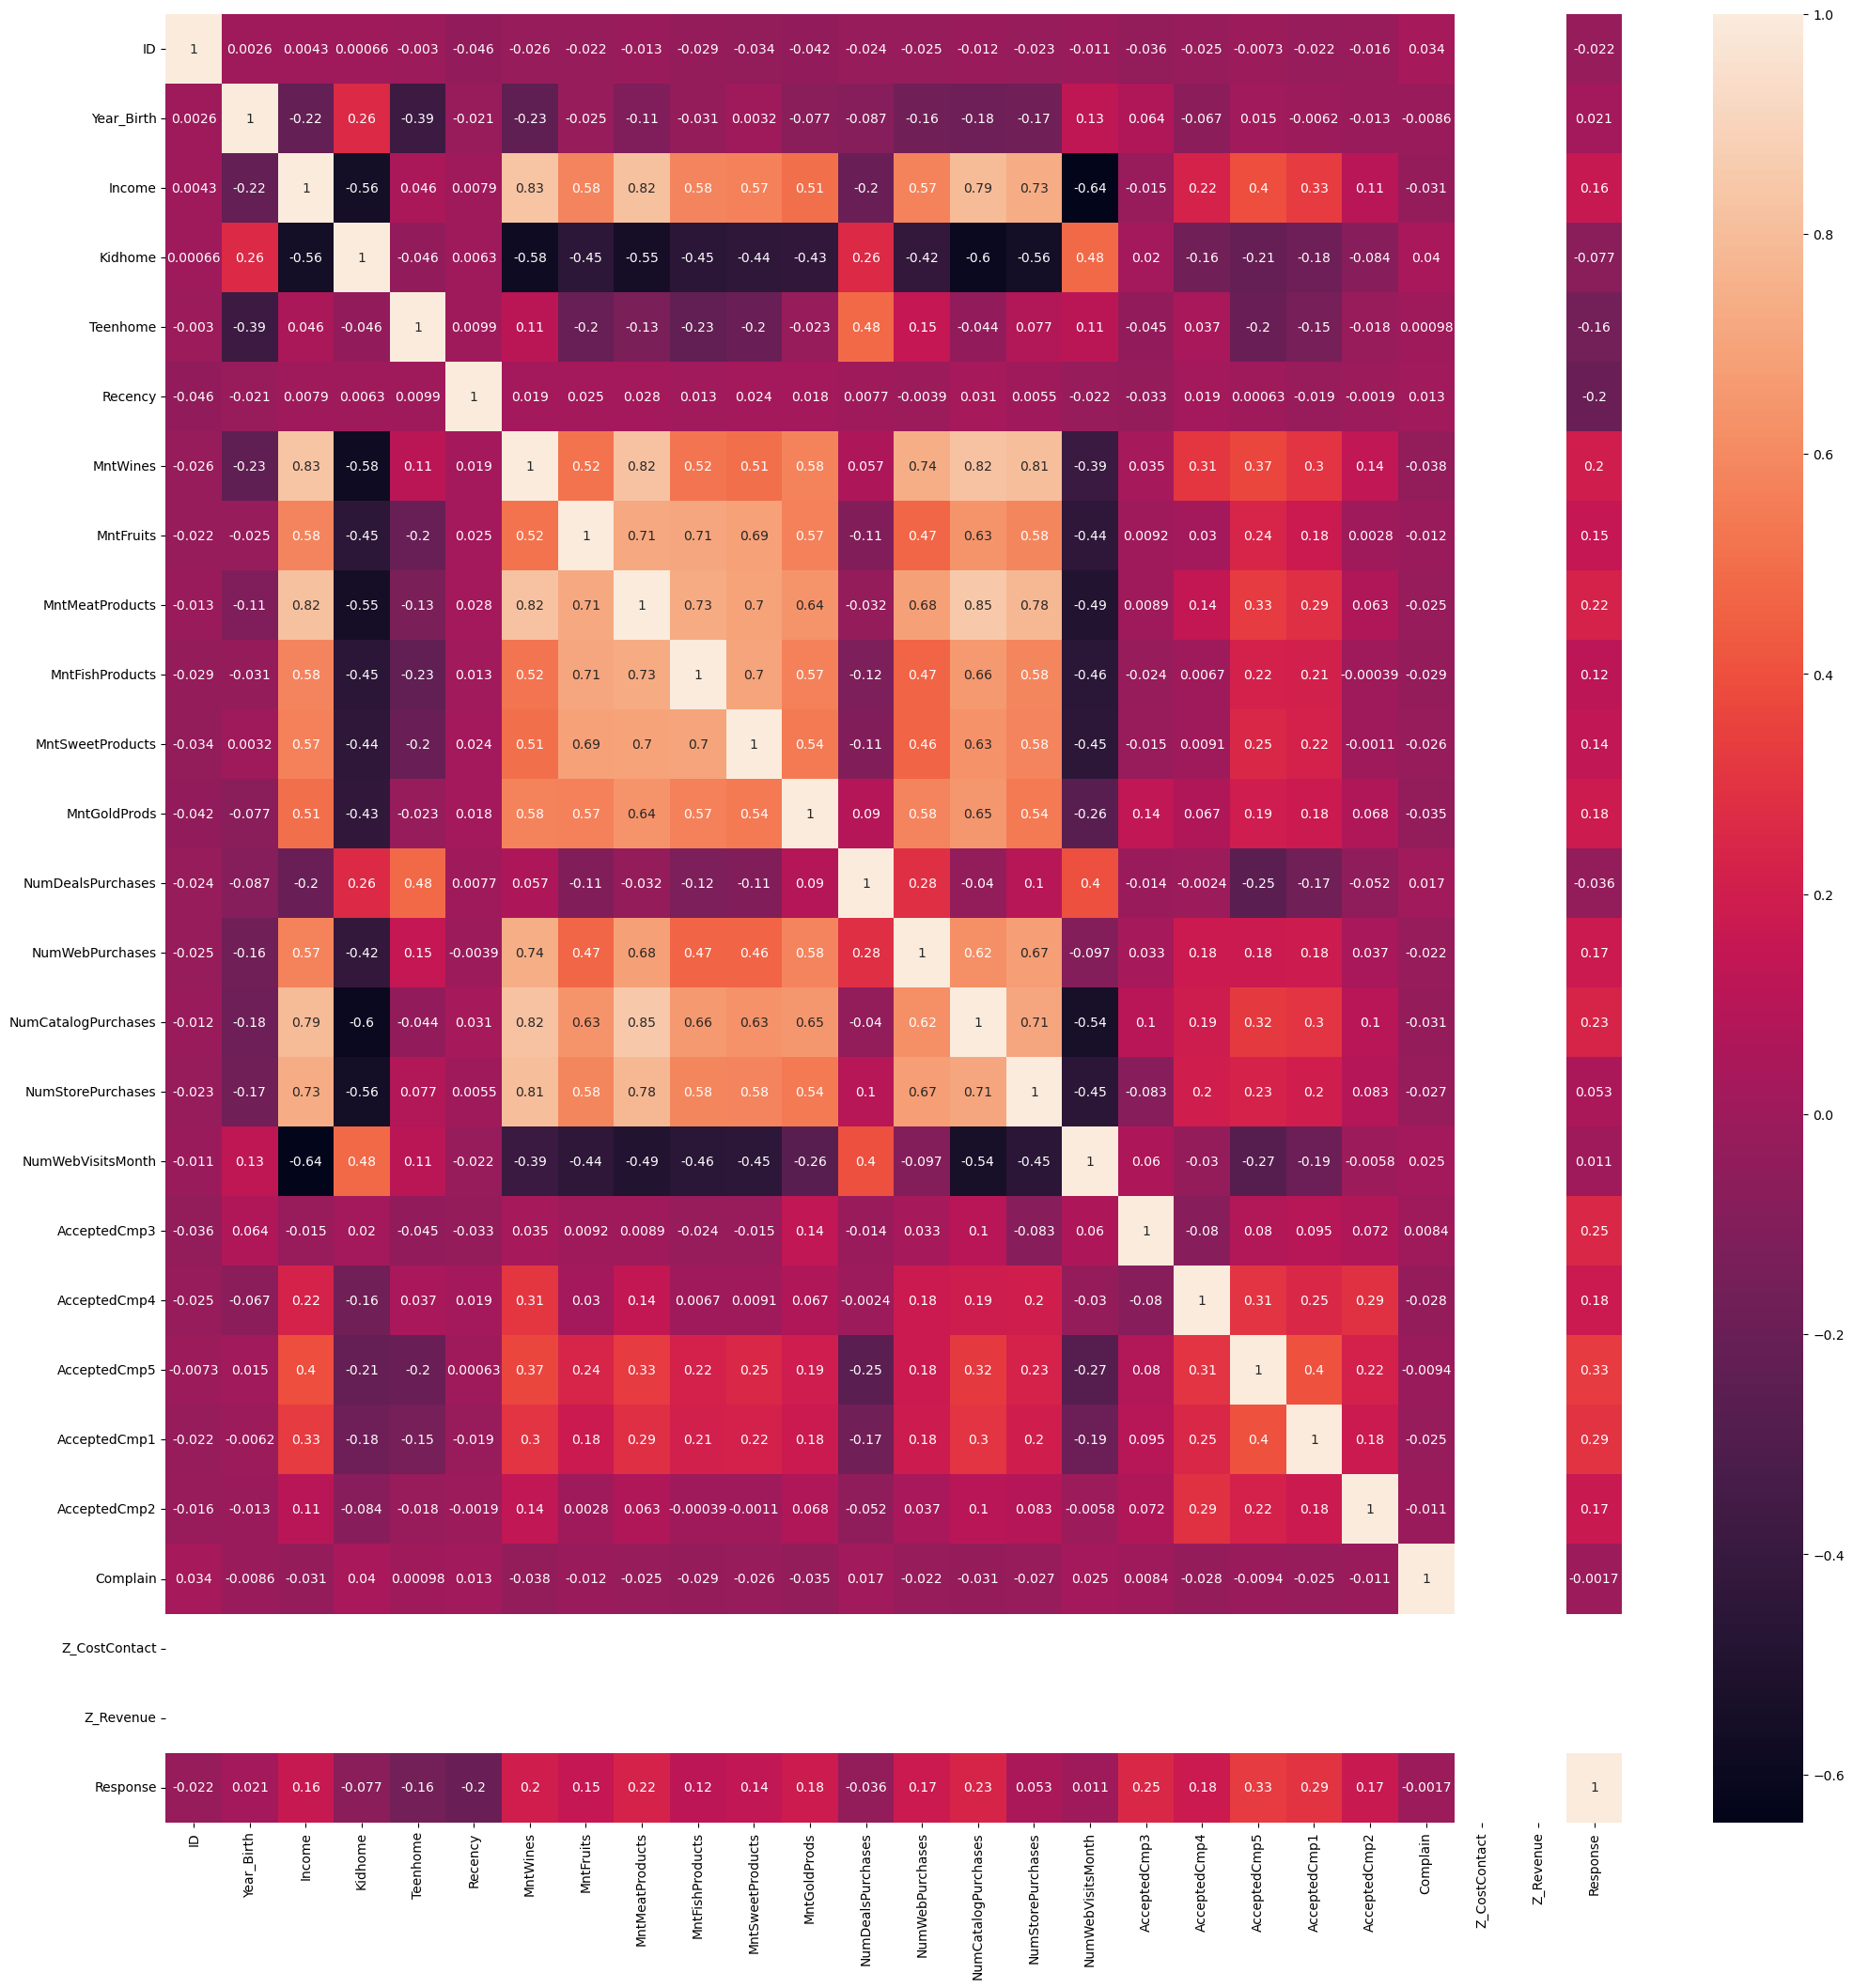

In [12]:
correlation = scust.corr(method='spearman',numeric_only=True)

plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True)

Komentar: 
* distribusi data pada kolom "year birth" dan "income" dinilai tidak normal dikarenakan adanya outliers yang perlu ditangani. Row dengan outliers ini akan dihapus
* ouliers pada produk tidak menjadi masalah karena konteks value yang berkaitan eratdengan jumlah pembelian per member , begitu pula pada data channel pembelian
* korelasi memperlihatkan beberapa poin menarik yang bisa menjadi pertimbangan dalam pengolahan data nantinya: 
    * korelasi antara "income" : "wine", "meat" : "catalogue", "store" 
    * korelasi antara "deals" : "kids", "teen" : "web" 

## Categorical statistic

Kelima, kita akan melihat data kategorical dan diskripsinya: 

In [13]:
kategorik = scust.select_dtypes(exclude='number')
kategorik

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


In [15]:
kategorik.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Komentar: 
* data unik pada "edukasi" dan "marital status" akan disesuaikan dan disederhanakan untuk hasil pengolahan data yang lebh rapih dan terstruktur   

# DATA CLEANING

Note: 2240 row x 29 kolom
* remove: 
    * "z_revenue" dan "z_costcontact" hanya memiliki 1 data unik, yang artinya kolom tersebut tidak mendiskripsikan maupun membedakan 1 member dengan yang lainnya
    * 24 'n/a' value di dalam kolom "income"
    * outliers: year birth, income
    * "response" tidak didefinisikan secara jelas dan spesifik dan berpotensi tumpang tindih dengan data kampanye lainnya
* change: 
    * "year of birth" (tahun kelahiran) akan diganti menjadi value "age" (umur) 
    * dalam "education", value 'basic' dan '2n cycle' akan diredefinisikan
    * dalam "marital status", value 'alone', 'absurd' dan 'YOLO' akan diredefinisikan
    * "dt_customer" dideskripsikan sebagai tipe "object" padahal value sebenarnya adalah berupa tanggalan (datetime64)
    * kolom "acceptedcmp" tidak berurutan sehingga perlu dirapihkan dengan cara diurutkan
* add: 
    * "marital status" akan dikategorikan menjadi jumlah anggota rumahtangga 1 atau 2 orang, ditambah dengan jumlah dari "kidhome" dan "teenhome" = "household member"
    * "income" akan dikategorikan dengan cara mengkobinasi nilai dari "income" dan "household member" = "income class"
    * kolom yang mentotal jumlah campaign yang di terima per member = "TotAcceptedCmp"
    * untuk RFM, dimana:
        * value Recency = "R_LastPurchase", dan dibagi menjadi 4 ranking (qcut) dimana ranking 1 tertinggi dan 4 terendah = "Rq_Ranks"
        * value Frequency diambil dari total purchasing di semua channel per member = "F_PlacePurchase", dan dibagi menjadi 4 ranking (qcut) dimana ranking 1 tertinggi dan 4 terendah = "Fq_Ranks" 
        * value Monetary diambil dari total pembelian produk per member = "M_ProductPurchase", dan dibagi menjadi 4 ranking (qcut) dimana ranking 1 tertinggi dan 4 terendah = "Mq_Ranks" 
    * total ranking RFM per member = "RFM_Score", akan manjadi acuan level membership yang dibagi menjadi 4 bagian, dimana Platinum adalah member dengan RFM Tertinggi (paling rajin dan banyak berbelanja), diikuti dengan Gold, Silver dan Bronze sebagai member dengan RFM terendah (paling jarang dan sedikit berbelanja) = "Membership"

In [46]:
scust_clean = scust.copy()

## Removing

### drop unnecessary columns = 3 columns

In [47]:
scust_clean = scust_clean.drop(['Z_CostContact','Z_Revenue', 'Response'], axis=1)

### remove n/a rows = 24 rows

In [48]:
scust_clean.dropna(inplace = True)

### remove outliers at year birth and income = xx rows

In [49]:
def remove_outliers(scust_clean, column):
    Q1 = scust_clean[column].quantile(0.25)
    Q3 = scust_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return scust_clean[(scust_clean[column] >= lower_bound) & (scust_clean[column] <= upper_bound)]

scust_clean = remove_outliers(scust_clean, 'Year_Birth')
scust_clean = remove_outliers(scust_clean, 'Income')

### read data

In [50]:
scust_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,8,10,4,7,0,0,0,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,9,3,4,5,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,8,2,5,7,0,0,0,1,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,2,3,13,6,0,1,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,6,5,10,3,0,0,0,0,0,0


## Changing

### redefine values - convert "DT_Customer" to datetime

In [51]:
scust_clean['Dt_Customer'] = pd.to_datetime(scust_clean['Dt_Customer'], dayfirst=True)

### redefine values - year birth to age

In [52]:
current_year = 2014
scust_clean.insert(2, 'Age', scust_clean['Year_Birth'].apply(lambda x : current_year-x))
scust_clean.drop('Year_Birth', axis=1, inplace=True)

### redefine values - education

Basic => Graduation || 2n Cycle => Master

In [53]:
scust_clean['Education'].value_counts()    

Education
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [54]:
scust_clean['Education'] = scust_clean['Education'].replace({'2n Cycle': 'Master', 'Basic': 'Graduation'})

scust_clean['Education'].value_counts()

Education
Graduation    1167
Master         562
PhD            476
Name: count, dtype: int64

### redefine values - marital status
Together => Married || Divorced, Widow, Alone, Absurd, YOLO => Single

In [55]:
scust_clean['Marital_Status'].value_counts()

Marital_Status
Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [56]:
scust_clean['Marital_Status'] = scust_clean['Marital_Status'].replace({
    'Together': 'Married', 
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single', 
    'YOLO': 'Single'
    })

scust_clean['Marital_Status'].value_counts()

Marital_Status
Married    1422
Single      783
Name: count, dtype: int64

### read data

In [57]:
pd.set_option('display.max_colwidth', None)
columns_show = ['Age', 'Education', 'Marital_Status', 'Dt_Customer']
listItem = []
for col in columns_show :
    listItem.append( [col, scust_clean[col].nunique(), scust_clean[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Age,56,"[57, 60, 49, 30, 33, 47, 43, 29, 40, 64, 38, 55, 62, 27, 68, 34, 65, 32, 35, 63, 45, 25, 51, 44, 41, 71, 39, 18, 46, 50, 37, 36, 59, 48, 26, 66, 56, 42, 54, 31, 69, 23, 52, 61, 58, 22, 53, 28, 24, 67, 21, 20, 73, 70, 19, 74]"
1,Education,3,"[Graduation, PhD, Master]"
2,Marital_Status,2,"[Single, Married]"
3,Dt_Customer,662,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-02-20 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06-20 00:00:00, 2013-07-23 00:00:00, 2014-03-30 00:00:00, 2013-04-20 00:00:00, 2013-05-17 00:00:00, 2014-05-08 00:00:00, 2013-12-10 00:00:00, 2013-09-24 00:00:00, 2013-02-02 00:00:00, 2012-12-07 00:00:00, 2013-11-02 00:00:00, 2012-11-10 00:00:00, 2014-06-25 00:00:00, 2012-12-12 00:00:00, 2013-09-10 00:00:00, 2014-01-24 00:00:00, 2013-02-19 00:00:00, 2013-07-11 00:00:00, 2013-11-14 00:00:00, ...]"


## Adding

### household member

In [58]:
Marital_Status_Count = scust_clean['Marital_Status'].apply(lambda x: 1 if x in ['Single'] else 2)
Household_Member_Total = scust_clean['Kidhome'] + scust_clean['Teenhome'] + Marital_Status_Count

scust_clean.insert(5, 'Household_Member', Household_Member_Total)
scust_clean.drop(['Marital_Status', 'Kidhome', 'Teenhome'], axis=1, inplace=True)

### income class

In [59]:
thresholds = {
    1: {'middle': 24173, 'upper': 72521},
    2: {'middle': 34186, 'upper': 102560},
    3: {'middle': 41869, 'upper': 125609},
    4: {'middle': 48347, 'upper': 145041},
    5: {'middle': 54053, 'upper': 162161},
}

def classify_income(row):
    household = row['Household_Member']
    income = row['Income']
    if household in thresholds:
        if income >= thresholds[household]['upper']:
            return 'High'
        elif income >= thresholds[household]['middle']:
            return 'Medium'
        else:
            return 'Low'
    else:
        # Default classification if household number is not in thresholds
        return 'Unknown'
# Apply the function
scust_clean['Income_Class'] = scust_clean.apply(classify_income, axis=1)

### total accepted campaign

In [60]:
total_accepted_campaign = scust_clean['AcceptedCmp1'] + scust_clean['AcceptedCmp2'] + scust_clean['AcceptedCmp3'] + scust_clean['AcceptedCmp4'] + scust_clean['AcceptedCmp5']

scust_clean.insert(20, 'TotAcceptedCmp', total_accepted_campaign)

### RFM 

#### recency value

In [61]:
#rename 
scust_clean.rename(columns= {'Recency':'R_LastPurchase'}, inplace = True)

In [62]:
#Ranks-Quartile 
scust_clean['Rq_Ranks'] = pd.qcut(scust_clean['R_LastPurchase'], 4, ['1', '2', '3', '4'])

In [63]:
#change data type from category to int
scust_clean['Rq_Ranks'] = scust_clean['Rq_Ranks'].astype(int)

#### frequency value

In [64]:
#new column
total_store_purchase = scust_clean['NumStorePurchases'] + scust_clean['NumCatalogPurchases'] + scust_clean['NumWebPurchases']

scust_clean.insert(17, 'F_PlacePurchase', total_store_purchase)

In [65]:
#Ranks-Quartile 
scust_clean['Fq_Ranks'] = pd.qcut(scust_clean['F_PlacePurchase'], 4, ['1', '2', '3', '4'])

In [66]:
#change data type from category to int
scust_clean['Fq_Ranks'] = scust_clean['Fq_Ranks'].astype(int)

#### monetary value 

In [67]:
#new column
total_product_purchase = scust_clean['MntWines'] + scust_clean['MntFruits'] + scust_clean['MntMeatProducts'] + scust_clean['MntFishProducts'] + scust_clean['MntSweetProducts'] + scust_clean['MntGoldProds']

scust_clean.insert(12, 'M_ProductPurchase', total_product_purchase)

In [68]:
#Ranks-Quartile 
scust_clean['Mq_Ranks'] = pd.qcut(scust_clean['M_ProductPurchase'], 4, ['1', '2', '3', '4'])

In [69]:
#change data type from category to int
scust_clean['Mq_Ranks'] = scust_clean['Mq_Ranks'].astype(int)

#### overall RFM ranks per ID

In [70]:
scust_clean['RFM_Score'] = scust_clean['Rq_Ranks'] + scust_clean['Fq_Ranks'] + scust_clean['Mq_Ranks']
def categorize_score(score):
    if 3 <= score <= 4:
        return 'Platinum Member'
    elif 5 <= score <= 6:
        return 'Golden Member'
    elif 7 <= score <= 9:
        return 'Silver Member'
    elif 10 <= score <= 12:
        return 'Bronze Member'

# Apply function
scust_clean['Membership'] = scust_clean['RFM_Score'].apply(categorize_score)

### re ordering rows

In [71]:
columns_order = [
    'ID', 'Age', 'Education', 'Household_Member', 'Income', 'Income_Class', 
    'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds','M_ProductPurchase', 'Mq_Ranks', 'R_LastPurchase', 'Rq_Ranks', 
    'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'F_PlacePurchase', 'Fq_Ranks',  
    'RFM_Score', 'Membership', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
    'TotAcceptedCmp', 'Complain'
]

scust_clean = scust_clean[columns_order]

### read data

In [72]:
scust_clean

,ID,Age,Education,Household_Member,Income,Income_Class,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,RFM_Score,Membership,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotAcceptedCmp,Complain
0,5524,57,Graduation,1,58138.0,Medium,2012-09-04,635,88,546,...,11,Bronze Member,3,0,0,0,0,0,0,0
1,2174,60,Graduation,3,46344.0,Medium,2014-03-08,11,1,6,...,4,Platinum Member,2,0,0,0,0,0,0,0
2,4141,49,Graduation,2,71613.0,Medium,2013-08-21,426,49,127,...,9,Silver Member,1,0,0,0,0,0,0,0
3,6182,30,Graduation,3,26646.0,Low,2014-02-10,11,4,20,...,4,Platinum Member,2,0,0,0,0,0,0,0
4,5324,33,PhD,3,58293.0,Medium,2014-01-19,173,43,118,...,10,Bronze Member,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Graduation,3,61223.0,Medium,2013-06-13,709,43,182,...,9,Silver Member,2,0,0,0,0,0,0,0
2236,4001,68,PhD,5,64014.0,Medium,2014-06-10,406,0,30,...,9,Silver Member,7,1,0,0,0,0,1,0
2237,7270,33,Graduation,1,56981.0,Medium,2014-01-25,908,48,217,...,11,Bronze Member,1,0,0,0,1,0,1,0
2238,8235,58,Master,3,69245.0,Medium,2014-01-24,428,30,214,...,8,Silver Member,2,0,0,0,0,0,0,0


| Kategori          | Kolom                 | Deskripsi                                                                     |
| ------------------|-----------------------|------------------------------------------------------------------------------ |
| **People**        | ID                    | Identitas unik customer                                                       |
|                   | Age                   | Umur customer                                                                 |
|                   | Education             | Level edukasi customer                                                        |
|                   | Household_Member      | Jumlah anggota rumahtangga customer                                           |
|                   | Income                | Pendapatan per tahun customer                                                 |
|                   | Income_Class          | Kelas ekonomi per income : household member                                   |
|                   | Dt_Customer           | Tanggal pendaftaran customer menjadi member Supermarket                       |
| **Products**      | MntWines              | Jumlah (buah) pembelian produk wine dalam 2 tahun terakhir                    |
|                   | MntFruits             | Jumlah (buah) pembelian produk buah dalam 2 tahun terakhir                    |
|                   | MntMeatProducts       | Jumlah (buah) pembelian produk daging dalam 2 tahun terakhir                  |
|                   | MntFishProducts       | Jumlah (buah) pembelian produk ikan dalam 2 tahun terakhir                    |
|                   | MntSweetProducts      | Jumlah (buah) pembelian produk manis dalam 2 tahun terakhir                   |
|                   | MntGoldProds          | Jumlah (buah) pembelian produk emas dalam 2 tahun terakhir                    |
|                   | M_ProductPurchase     | Total pembelian produk per member                                             |
|                   | Mq_Ranks              | Ranking total pembelian produk per member                                     |
|                   | R_LastPurchase        | Jumlah hari sejak terakhir kali customer berbelanja                           |
|                   | Rq_Ranks              | Ranking hari sejak terakhir kali customer berbelanja                          |
| **Place**         | NumWebVisitsMonth     | Jumlah pengunjungan ke website Supermarket selama sebulan terakhir            |
|                   | NumWebPurchases       | Jumlah pembelian melalui website Supermarket                                  |
|                   | NumCatalogPurchases   | Jumlah pembelian melalui katalog Supermarket                                  |
|                   | NumStorePurchases     | Jumlah pembelian melalui toko Supermarket                                     |
|                   | F_PlacePurchase       | Total purchasing di semua channel per member                                  |
|                   | Fq_Ranks              | Ranking total purchasing di semua channel per member                          |
| **RFM**           | RFM_Score             | Total ranking dari masing-masing kategori per member                          | 
|                   | Membership            | Label ranking berdasarkan RFM Score                                           |
| **Promotion**     | NumDealsPurchases     | Jumlah pembelian menggunakan/melalui promosi                                  |
|                   | AcceptedCmp1          | 1 jika customer menerima tawaran kampanye 1, jika tidak 0                     |
|                   | AcceptedCmp2          | 1 jika customer menerima tawaran kampanye 2, jika tidak 0                     |
|                   | AcceptedCmp3          | 1 jika customer menerima tawaran kampanye 3, jika tidak 0                     |
|                   | AcceptedCmp4          | 1 jika customer menerima tawaran kampanye 4, jika tidak 0                     |
|                   | AcceptedCmp5          | 1 jika customer menerima tawaran kampanye 5, jika tidak 0                     |
|                   | TotoAcceptedCmp       | Total penerimaan tawaran dari kampanye 1-5                                    |
|                   | Complain              | 1 jika customer pernah komplain selama 2 tahun terakhir, jika tidak 0         |    


## CSV

In [73]:
scust_clean.to_csv('cleaned_supermarket_customer(4).csv', index=False)